<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Инжиниринг категориальных признаков**

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [6]:
CS_data = pd.read_csv("Customer_support_data.csv")
CS_data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [7]:
T_data = pd.read_csv("titanic.csv")
T_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [9]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [10]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


Здесь явно видно, например, что имя - полностью уникальный атрибут. А вот в одной каюте могло находиться до четырех человек. Что удивительно, номера билетов почему-то тоже повторяются.

**Визуализация распределения атрибутов и связь с целевой переменной**

<Axes: xlabel='channel_name', ylabel='Count'>

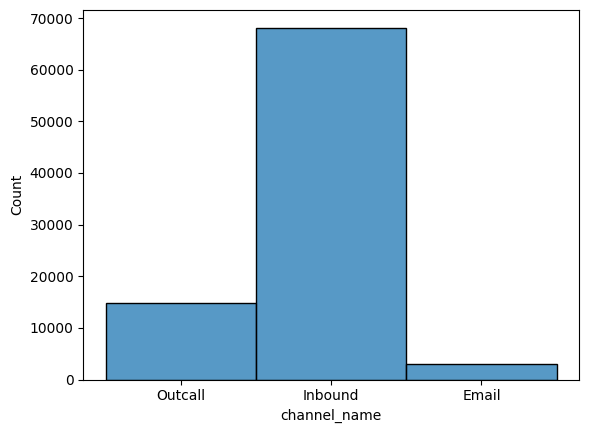

In [11]:
sns.histplot(data=CS_data, x="channel_name")

Это уже информацию можно вывести в табличном виде. Для подсчета количества объектов со всеми возможными вариантами значения по определенной колонке в pandas существует специальная функция

In [12]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


Сразу же построим совместное распределение данного признака и целевой переменной. Так как признак категориальный, а целевая переменная - численная, мы можем построить на столбчатой диаграмме среднее значение целевой переменной для каждой категории

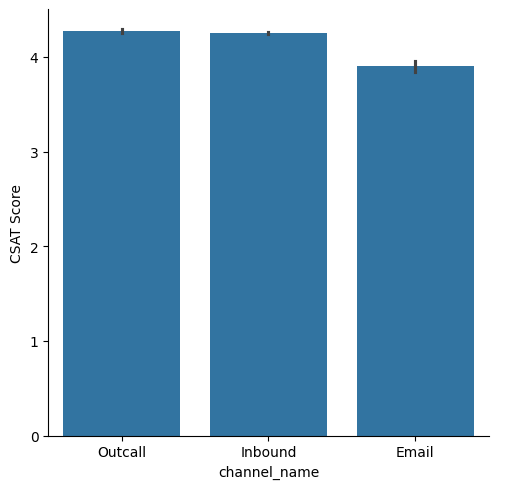

In [13]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

In [14]:
CS_data.category.value_counts()

,count
category,
Returns,44097
Order Related,23215
Refund Related,4550
Product Queries,3692
Shopzilla Related,2792
Payments related,2327
Feedback,2294
Cancellation,2212
Offers & Cashback,480


 В данном случае значений не так много и можно построить гистограмму. Но мы построим ее по упорядоченному набору значений

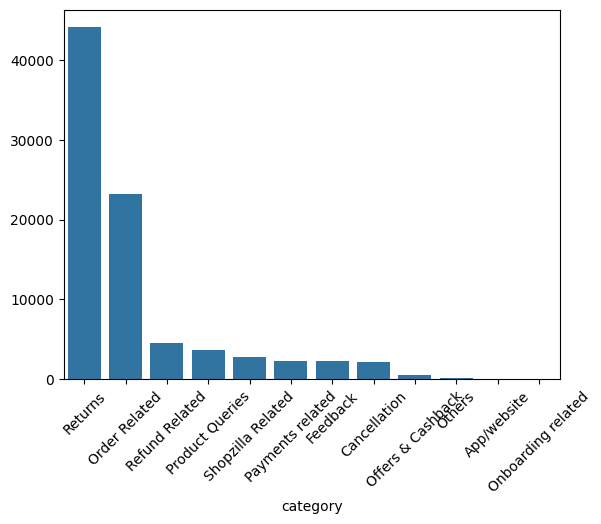

In [15]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

выведем среднее значение удовлетворенности в зависимости от значения данного признака

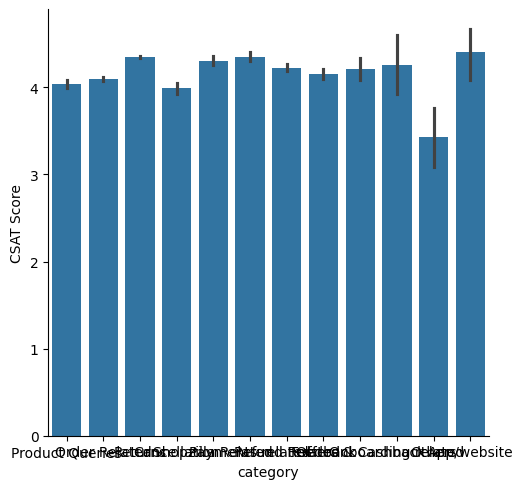

In [16]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar")

Теперь визуализируем распределение по подкатегориям. Заметно, что при увеличении количества категорий анализ становится проводить затруднительно

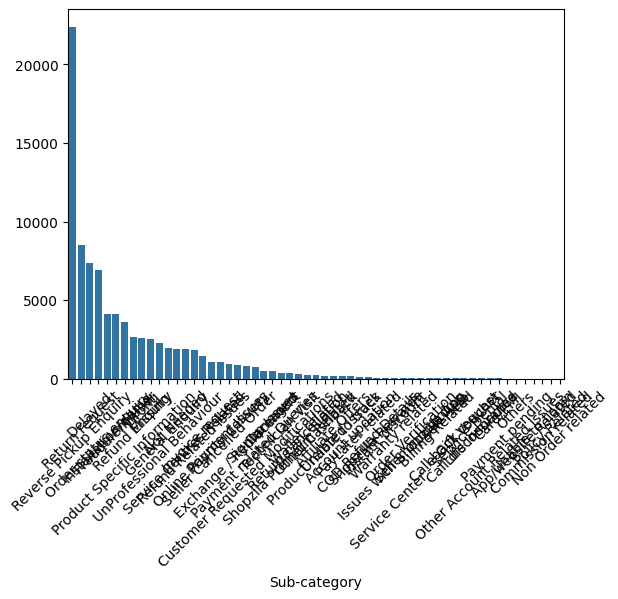

In [17]:
counts = CS_data["Sub-category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

In [18]:
CS_data["Sub-category"].value_counts().head()

,count
Sub-category,
Reverse Pickup Enquiry,22389
Return request,8523
Delayed,7388
Order status enquiry,6922
Installation/demo,4116


Визуализация совместного распределения с целевой переменной тоже выглядит довольно страшно

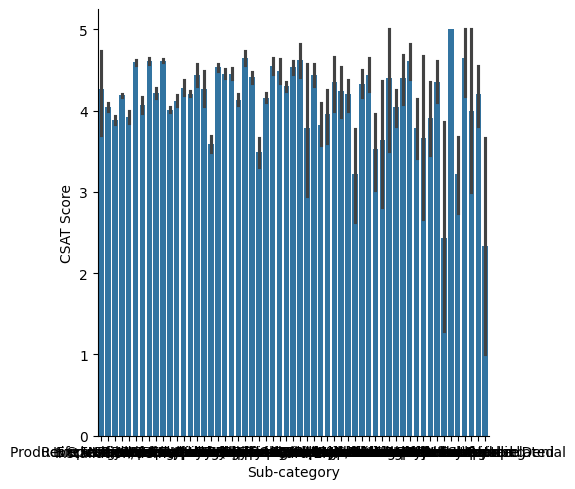

In [19]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar")

Казалось бы, по этому графику ничего нельзя понять. Но можно сделать вывод: чем менее популярное значение, там больше дисперсия (обозначенная на графике черной вертикальной линией) целевой переменной. Этого и следовало ожидать.

In [20]:
CS_data["Customer Remarks"].value_counts()

,count
Customer Remarks,
Good,1390
Good,1158
Very good,569
Nice,316
Thanks,276
...,...
Please add option to delete order history,1
Me,1
Delivery person call back received,1


Помним, что по этому полю присутствует большое количество пропущенных значений. Можем сделать вывод, что если отзыв присутствует, то с большой долей вероятности он положительный. Поэтому на будущее заметим, что этот атрибут будет логично бинаризовать.

In [21]:
CS_data["Customer_City"].value_counts()

,count
Customer_City,
HYDERABAD,722
NEW DELHI,688
PUNE,435
MUMBAI,406
BANGALORE,352
...,...
NARAULI,1
AYOOR,1
MUL,1


Но чтобы хоть как-то понять общую форму распределения, все-таки изобразим гистограмму

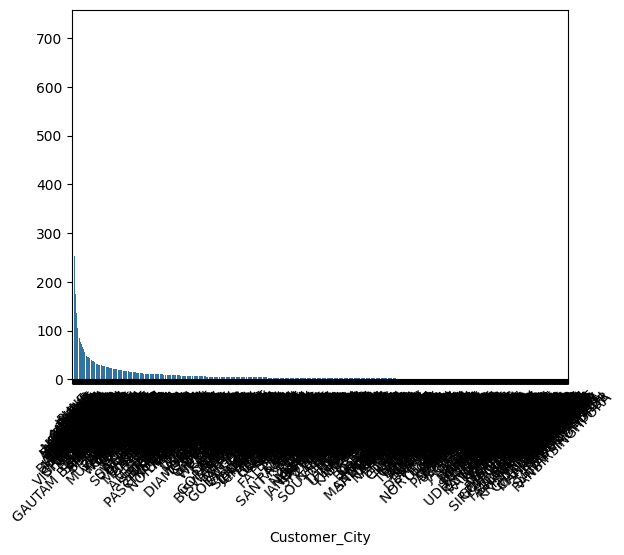

In [22]:
counts = CS_data["Customer_City"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Явно наблюдается экспоненциальное распределение. Несколько очень популярных городов и огромное количество очень редких. Хотя, глядя на таблицу, складывается ощущение, что частоты падают довольно плавно

Распределение по продуктовой категории не такое экстремальное. Конечно, есть более и менее популярные категории, но в целом дисбаланс не такой выраженный

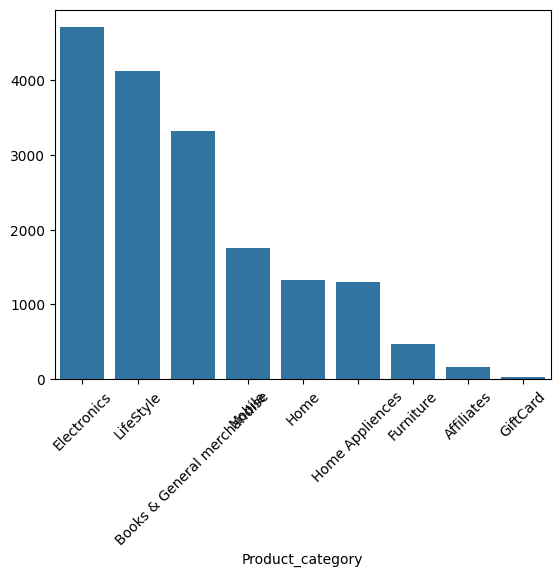

In [23]:
counts = CS_data["Product_category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

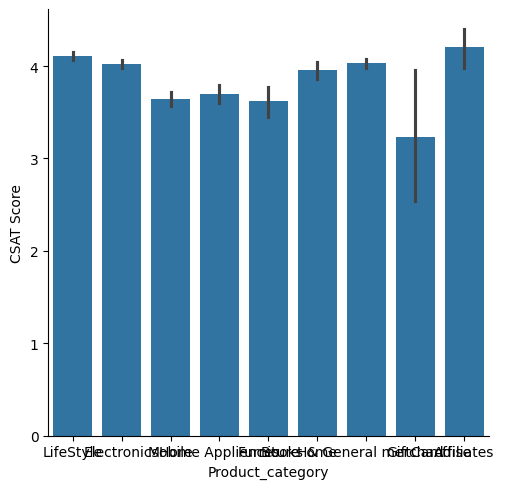

In [24]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar")

Распределение по операторам опять же выведем только в виде первых строк таблицы. Видим, что значений очень много и распределены они неравномерно

In [25]:
CS_data["Agent_name"].value_counts()

,count
Agent_name,
Wendy Taylor,429
Timothy Huff,265
David Smith,264
Jamie Smith,253
Kayla Wilson,216
...,...
Jackson Brown,20
Alexis Murray,20
Matthew Ross,20


Руководителей операторов меньше. На гистограмме видно, что дисбаланс присутствует, но не очень яркий

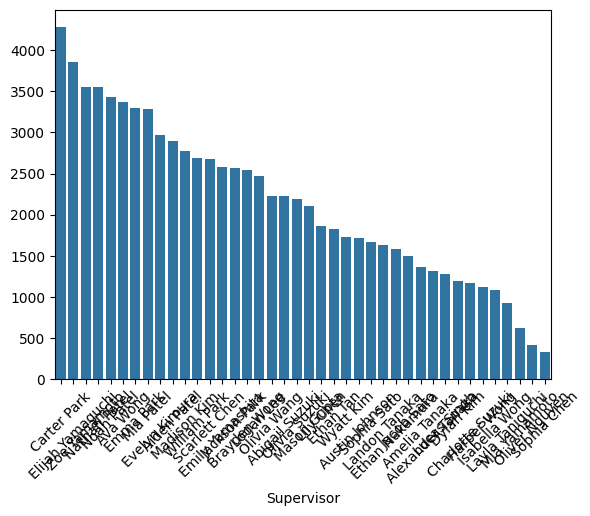

In [26]:
counts = CS_data["Supervisor"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

При этом явны различия в средней оценке для разных руководителей

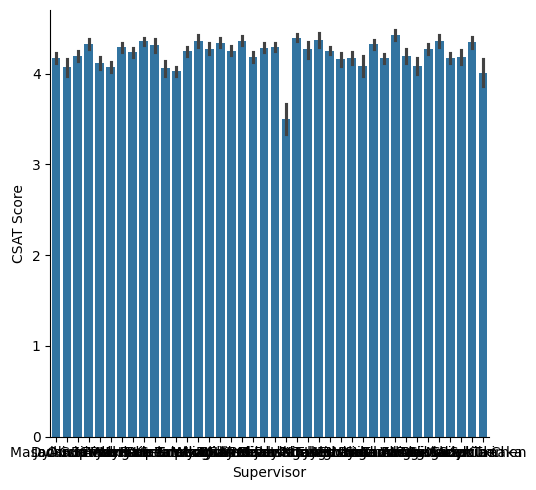

In [27]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar")

Количество менеджеров еще меньше и картина похожая на руководителей

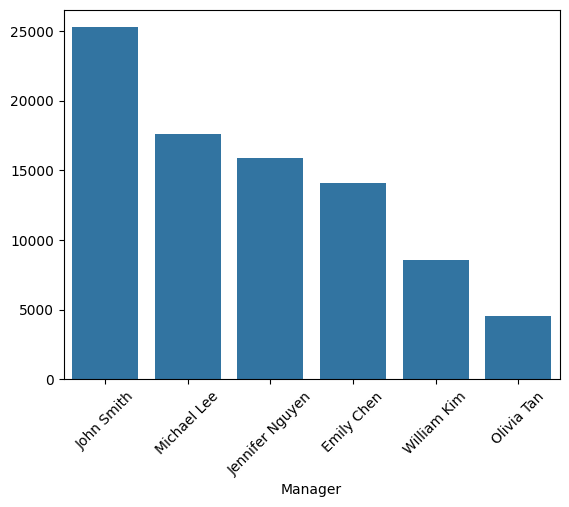

In [28]:
counts = CS_data["Manager"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Но различия в целевой переменной у разных менеджеров не такое явное. Видимо, это уже слишком крупная группировка и все различия усредняются

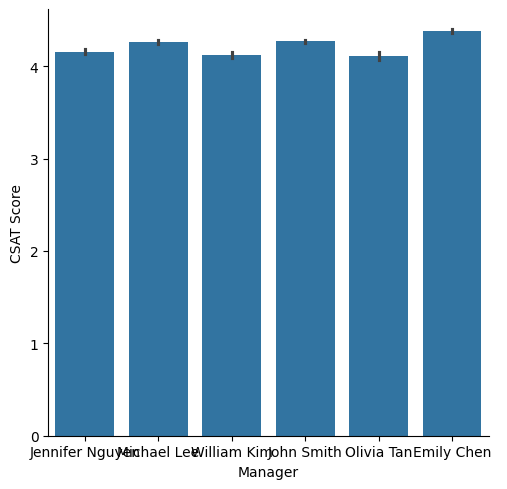

In [29]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar")

Распределение по типам контракта тоже не вызывает особых вопросов. Преобладают либо долгосрочные контракты, либо сотрудники на обучении

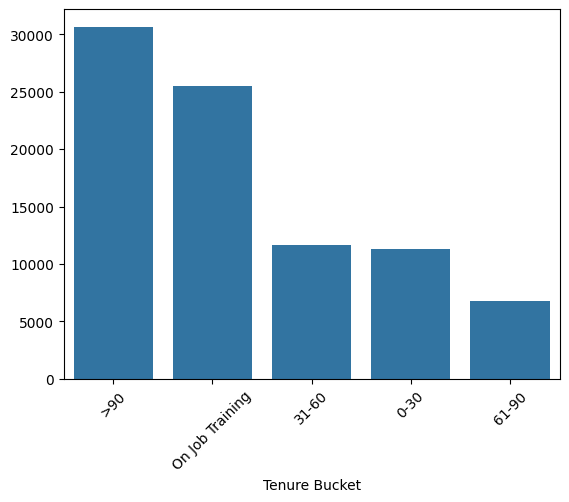

In [30]:
counts = CS_data["Tenure Bucket"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

При этом у стажеров средняя оценка совсем незначительно ниже, чем у других категорий, по стальным значимых различий нет

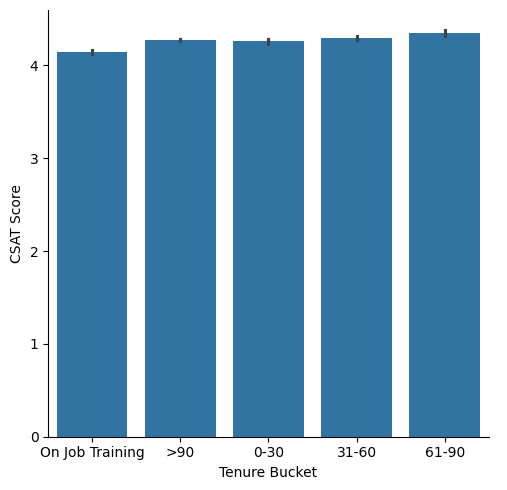

In [31]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")

По типам смен явно преобладают классические утренние и вечерние смены, гибридные варианты достаточно редки

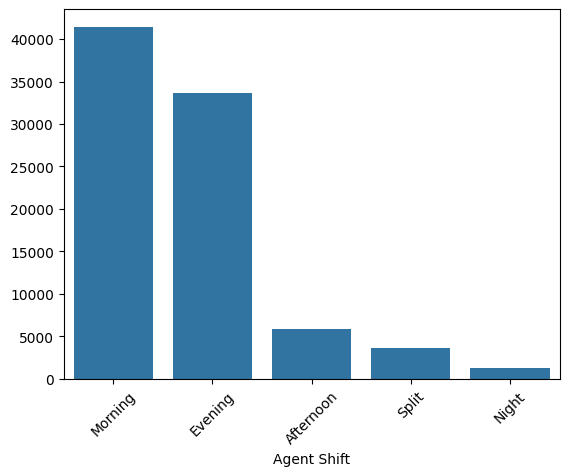

In [32]:
counts = CS_data["Agent Shift"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Есть небольшая вариация в средних значениях удовлетворенности, но ничего особенно примечательного

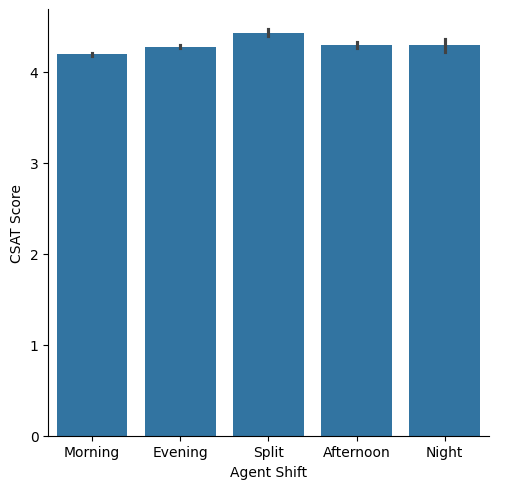

In [33]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")

В целом, анализ признаков дал нам некоторую информацию о возможных способах преобразования категориальных переменных, чем мы сейчас и займемся. Для более детального анализа влияния атрибутов на целевую переменную в данном случае понадобится дополнительный анализ.

**Укрупнение категорий**

При преобразовании категориальных данных основной проблемой зачастую является то, что при кодировании атрибута с большим количеством значений по методу One-Hot в результате может получиться слишком много столбцов, что вредно как для потенциального переобучения модели, так и не очень эффективно с плане вычислительных ресурсов.

Поэтому при возможности можно постараться укрупнить категории, то есть объединить близкие по смыслу значения атрибута. Посмотрим, например, на отзывы клиента. При анализе мы уже пришли к выводу, что если отзыв присутствует, то он скорее всего положительный. Поэтому можно бинаризировать этот атрибут - если отзыв есть, ставим 1, если нет - 0:

In [34]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

Точно также можно бинаризировать и наличие заказа

In [35]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

одкатегория обращения. Здесь мы видим большое количество малопопулярных значений. Часто в такой ситуации можно объединить редкие значения в одно, "Иное".

In [36]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [37]:
CS_data['Sub-category'].value_counts()

,count
Sub-category,
Other,28872
Reverse Pickup Enquiry,22389
Return request,8523
Delayed,7388
Order status enquiry,6922
Installation/demo,4116
Fraudulent User,4108
Product Specific Information,3589


**Добавление агрегированной информации**

Можно вывести информацию о количестве записей в колонке, сгруппированных по имени оператора

In [38]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


Это информация нам нужна для проверки предположения о том, что у операторов существенно различается загрузка

А для того, чтобы добавить колонку с количеством клиентов у соответствующего операторам можно вот так скомбинировать несколько функций pandas

In [39]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [40]:
CS_data

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Other,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,...,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,0,0,128
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Other,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,...,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5,1,0,75
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,...,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5,1,0,31
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,Other,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,...,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4,0,0,48


Точно так же можно поступить и с количеством операторов у одного руководителя. Но теперь нам понадобится другая агрегирующая функция, так как значения имени оператора могут повторяться

In [41]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [42]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

**Заполнение отсутствующих значений**

In [43]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [44]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

**Преобразование бинарных атрибутов**

Начнем с самого простого типа категориальных атрибутов - бинарных. Их можно преобразовывать как угодно. Самый компактный способ - LabelEncoder

In [45]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

**Преобразование порядковых атрибутов**

Порядковые атрибуты, то есть такие, значения которых можно сравнивать друг с другом, чаще всего приходится заменять с помощью вручную составленного словаря, чтобы соблюсти естественный порядок значений. Рассмотрим, например, класс обслуживания на Титанике. Его можно закодировать так

In [46]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

<ipython-input-46-7e2a4c6e8954>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({
<ipython-input-46-7e2a4c6e8954>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T_data.Pclass.replace({


**Преобразование номинальных атрибутов**

Номинальные атрибуты, к которым относится большинство категориальных, можно преобразовывать только с использованием OneHotEncoder. Этот способ кодирования следует выбирать в случае сомнений в типе шкалы атрибута.

In [47]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

Для формирования таблицы с преобразованными данными нам понадобится сформировать список названий колонок

In [48]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [49]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)

In [50]:
dummies

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


Они преобразует одну колонку с множеством значений в множество колонок с бинарными значениями

In [51]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

**Удаление лишних столбцов и массовое преобразование**

OneHotEncoder. Из-за его универсальности, его часто применяют массово, на всех категориальных атрибутах, независимо от типа. Именно для этого в pandas и существует функция get_dummies().

Но перед ее применением необходимо сначала удалить из датасета все ненужные колонки, особенно категориальные. После преобразования это будет сделать уже не так просто. Мы сейчас удалим все лишние атрибуты произвольно. На практике для этого можно использовать анализ значимости атрибутов.

In [52]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [53]:
CS_dropped.describe(exclude=[np.number])

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,85907,85907,85907
unique,3,12,10,212,6,5,5
top,Inbound,Returns,unknown,0,John Smith,>90,Morning
freq,68142,44097,68711,85665,25261,30660,41426


In [54]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int64 
 9   Is_order                 85907 non-null  int64 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.9+ MB


In [55]:
CS_dummies = pd.get_dummies(CS_dropped)

In [56]:
CS_dummies.shape

(85907, 258)

Универсальный код для обработки категориальных признаков

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preprocess_categorical(df, categorical_threshold=0.05, encoding='auto'):
    df = df.copy()
    encoders = {}

    for col in df.select_dtypes(include='object').columns:
        # Пропущенные значения → "Missing"
        df[col] = df[col].fillna("Missing")

        # Укрупнение редких категорий
        freq = df[col].value_counts(normalize=True)
        rare = freq[freq < categorical_threshold].index
        df[col] = df[col].apply(lambda x: "Other" if x in rare else x)

        # Выбор типа кодирования
        n_unique = df[col].nunique()
        use_label = encoding == 'label' or (encoding == 'auto' and n_unique <= 5)

        if use_label:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le
        else:
            ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # ✅ FIXED
            transformed = ohe.fit_transform(df[[col]])
            ohe_df = pd.DataFrame(transformed, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]])
            df = df.drop(columns=[col]).reset_index(drop=True)
            df = pd.concat([df, ohe_df], axis=1)
            encoders[col] = ohe

    return df, encoders


In [64]:
CS_processed, encoders = preprocess_categorical(CS_data, categorical_threshold=0.01, encoding='auto')
print(CS_processed.head())

   Unique id  channel_name  Customer Remarks  Order_id  order_date_time  \
0          0             2                 2         1                0   
1          0             2                 2         1                0   
2          0             1                 2         1                0   
3          0             1                 2         1                0   
4          0             1                 2         1                0   

   Issue_reported at  issue_responded  Customer_City  Item_price  \
0                  0                1              0         NaN   
1                  0                1              0         NaN   
2                  0                1              0         NaN   
3                  0                1              0         NaN   
4                  0                1              0         NaN   

   connected_handling_time  ...  Supervisor_Sophia Sato  \
0                      NaN  ...                     0.0   
1                     